In [ ]:
#!pip install pmdarima

In [94]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [95]:
#Import dataset
dataset=pd.read_csv('C:\\Users\\LENOVO\\Downloads\\archive (3)\\Walmart_Data.csv')

# Data Cleaning & Preparation

In [96]:
dataset.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [69]:
dataset.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [70]:
dataset.shape

(6435, 8)

In [71]:
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Feature Engineering

In [72]:
# Convert 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d-%m-%Y')

In [73]:
# Extract relevant date-time features
dataset['DayOfWeek'] = dataset['Date'].dt.dayofweek
dataset['Month'] = dataset['Date'].dt.month
dataset['Year'] = dataset['Date'].dt.year

In [74]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayOfWeek,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


# Exploratory Data Analysis (EDA)

In [75]:
#Ranking stores in descending order of weekly sales totals
dataset[['Store','Weekly_Sales']].groupby(['Store'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False)
#.plot.bar()

,Weekly_Sales
Store,
20,2.107677e+06
4,2.094713e+06
14,2.020978e+06
13,2.003620e+06
2,1.925751e+06
10,1.899425e+06
27,1.775216e+06
6,1.564728e+06
1,1.555264e+06


<Axes: xlabel='Store'>

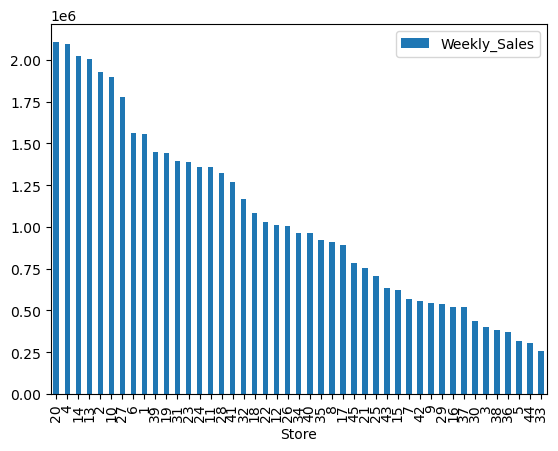

In [76]:
dataset[['Store','Weekly_Sales']].groupby(['Store'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False).plot.bar()

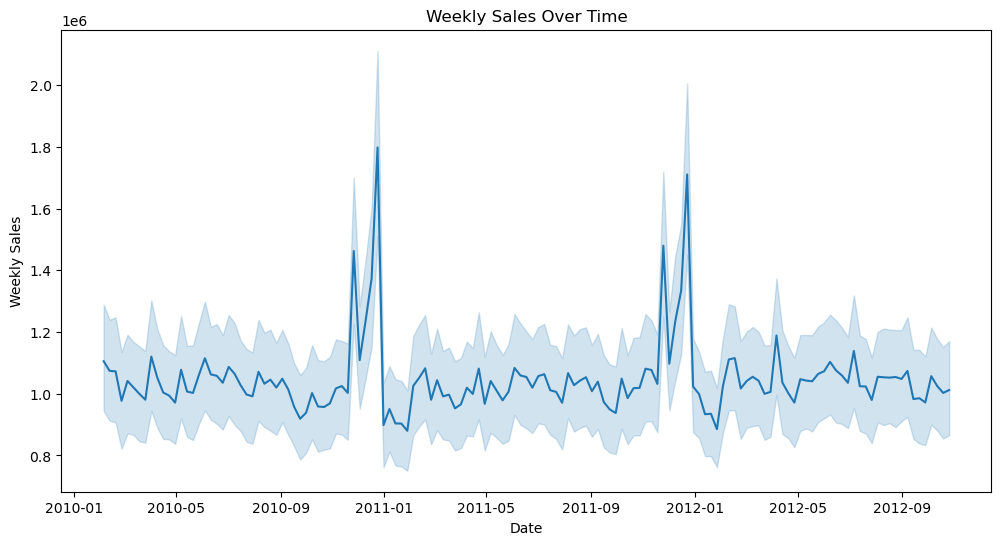

In [77]:
# Visualize the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=dataset)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

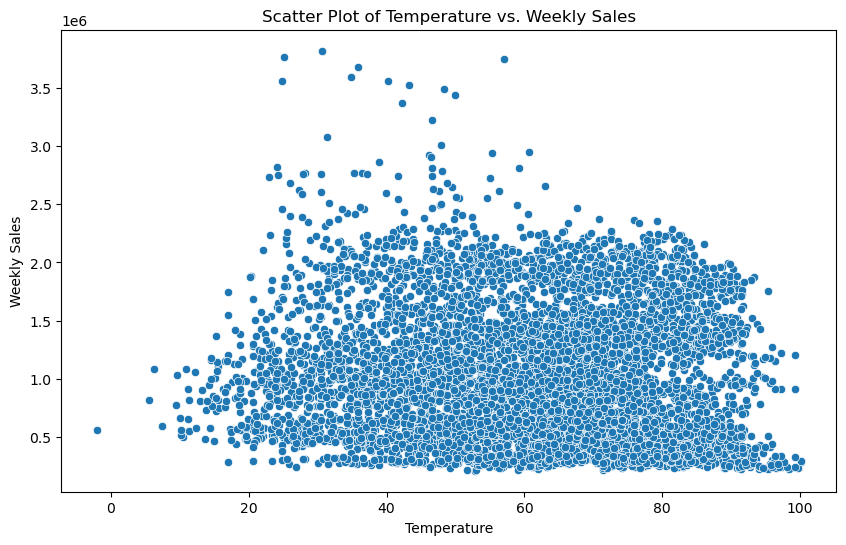

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=dataset)
plt.title('Scatter Plot of Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

C:\Users\LENOVO\Documents\Anconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


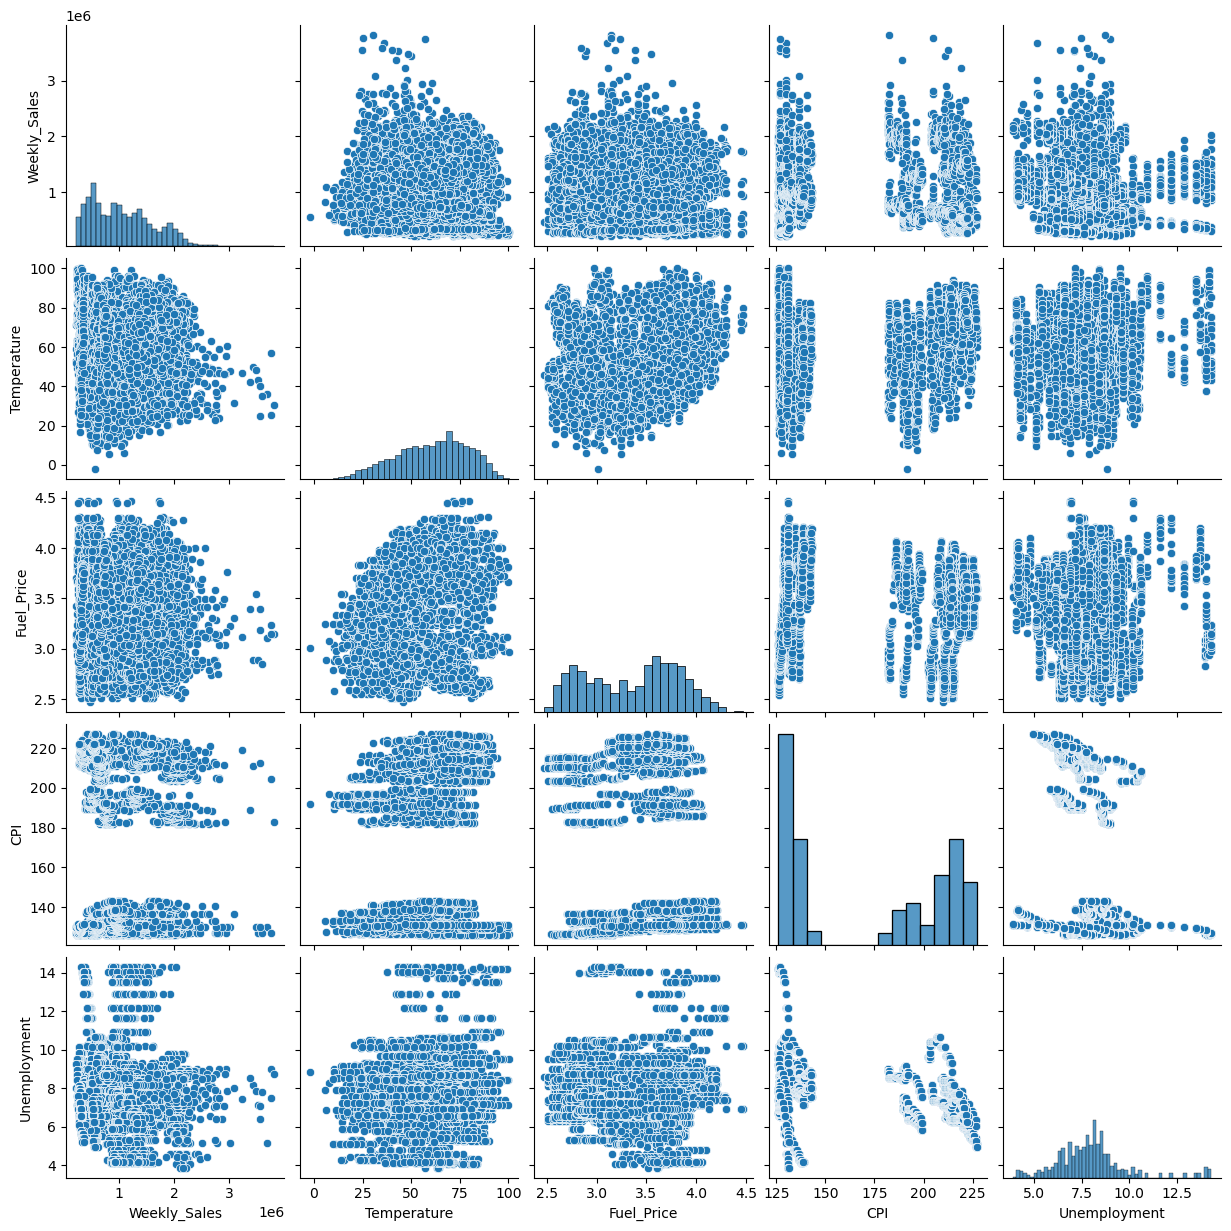

In [79]:
sns.pairplot(dataset[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])
plt.show()
#CPI -- Consumer Price Index

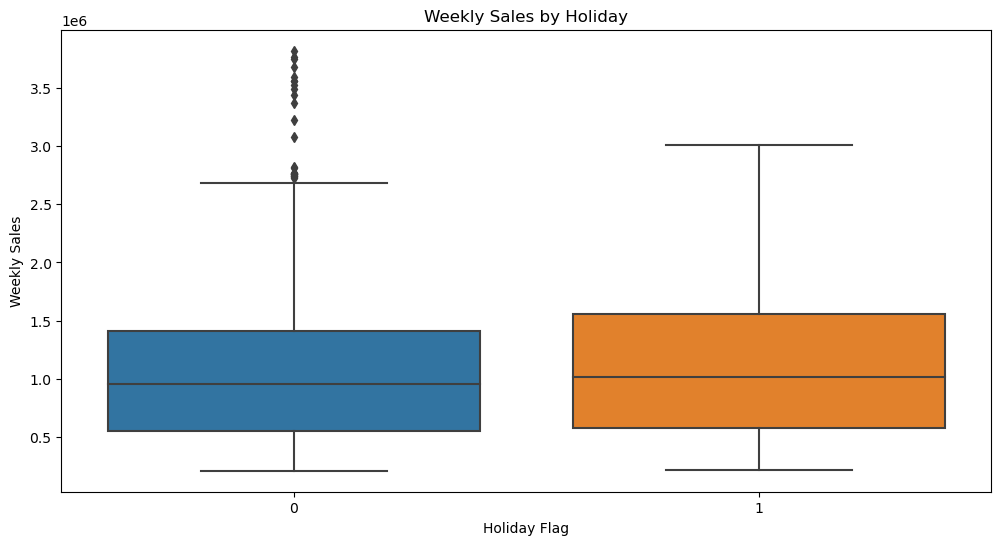

In [80]:
#Visualizing sales statistics on normal days and holidays 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=dataset)
plt.title('Weekly Sales by Holiday')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()

<Axes: xlabel='Month'>

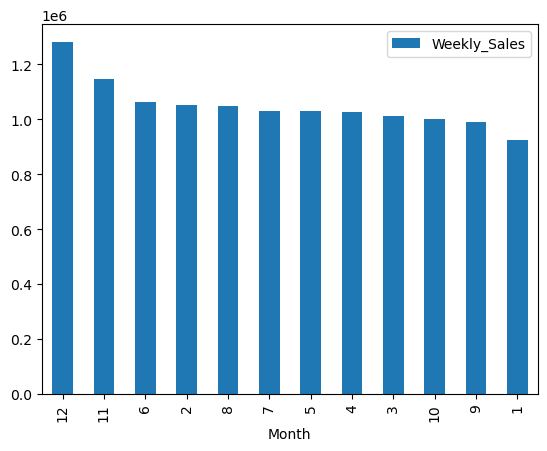

In [81]:
dataset[['Month','Weekly_Sales']].groupby(['Month'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False).plot.bar()

In [82]:
dataset[['Year','Weekly_Sales']].groupby(['Year'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False)#.plot.bar()

,Weekly_Sales
Year,
2010,1.059670e+06
2011,1.046239e+06
2012,1.033660e+06


<Axes: xlabel='Year'>

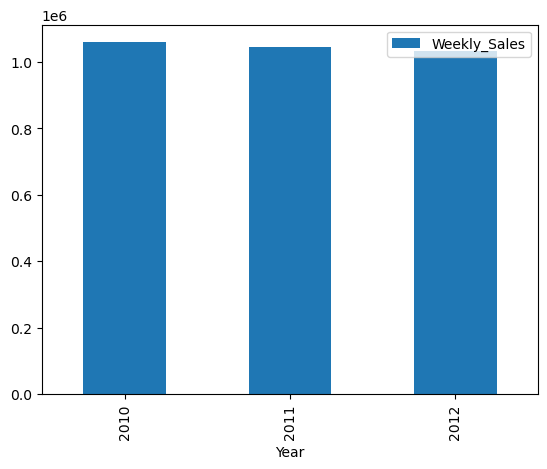

In [83]:
dataset[['Year','Weekly_Sales']].groupby(['Year'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False).plot.bar()

In [84]:
dataset[['Year','CPI']].groupby(['Year'],as_index=True).mean().sort_values(by='CPI',ascending=False)

,CPI
Year,
2012,175.498781
2011,171.545716
2010,168.101782


In [85]:
# Correlation analysis
correlation_matrix = dataset.corr()

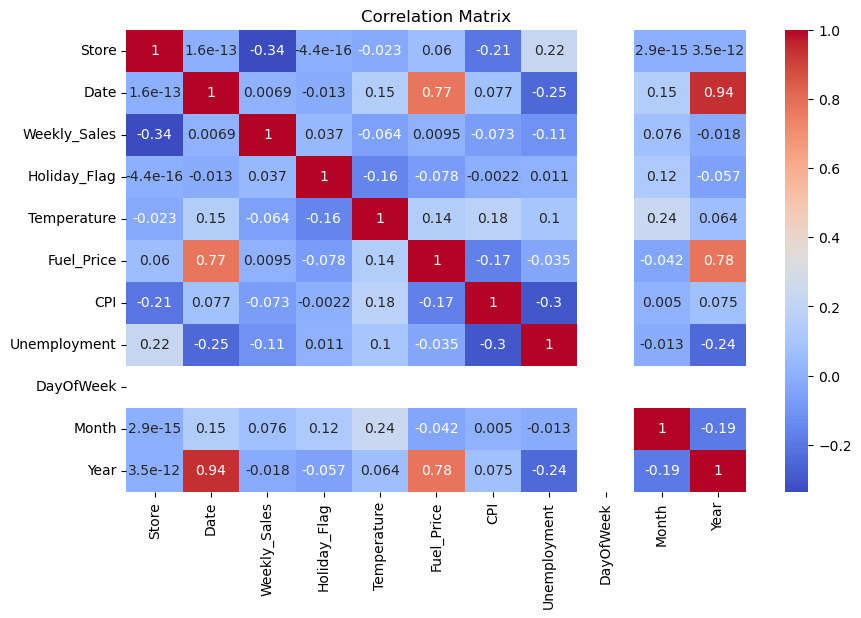

In [86]:
# Correlation matrix
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Time-Series Analysis

In [87]:
#visualize the underlying components of the time series, including trend, seasonality, and residual.
decomposition = seasonal_decompose(dataset['Weekly_Sales'], period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

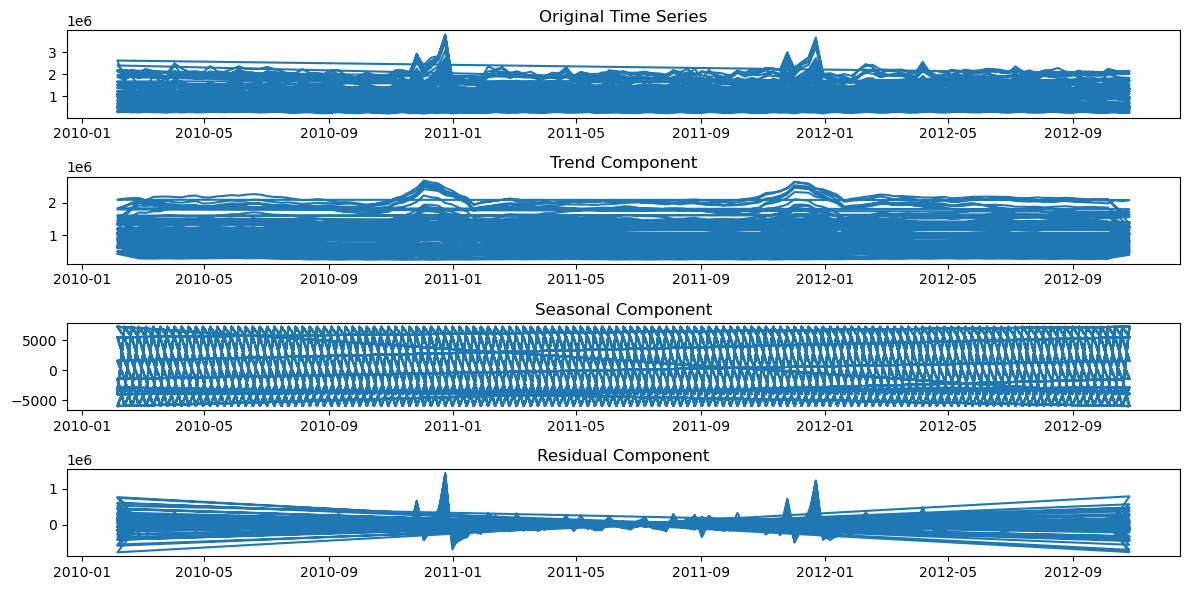

In [88]:
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(dataset['Date'], dataset['Weekly_Sales'], label='Original')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(dataset['Date'], trend, label='Trend')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(dataset['Date'], seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(dataset['Date'], residual, label='Residual')
plt.title('Residual Component')
plt.tight_layout()
plt.show()

# Machine Learning Modeling

# We have decided to compare two ML models:
1.Linear Regression

2.Random Forest Regressot

In [89]:
dataset.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'DayOfWeek', 'Month', 'Year'],
      dtype='object')

In [90]:
# Split the data into features and target variable
X = dataset[['Store', 'Holiday_Flag', 'CPI', 'DayOfWeek', 'Month', 'Year']]
y = dataset['Weekly_Sales']

In [91]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [92]:
# Create a Linear Regression model
linear_model = LinearRegression()

In [93]:
# Fit the model to the training data
linear_model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Get the coefficients of the Linear Regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print('Linear Regression Coefficients:')
print(coefficients)

Linear Regression Coefficients:
        Feature   Coefficient
1  Holiday_Flag  6.378827e+04
4         Month  1.367282e+04
5          Year  4.234399e+03
3     DayOfWeek  1.091394e-11
2           CPI -2.086117e+03
0         Store -1.571423e+04


In [54]:
# Predict sales on the test set
y_pred_linear = linear_model.predict(X_test)

In [55]:
# Calculate evaluation metrics for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error (MSE): {mse_linear}')
print(f'Linear Regression Mean Absolute Error (MAE): {mae_linear}')
print(f'Linear Regression R-squared (R2): {r2_linear}')

Linear Regression Mean Squared Error (MSE): 274358062063.70114
Linear Regression Mean Absolute Error (MAE): 434468.76306282723
Linear Regression R-squared (R2): 0.148365125989673


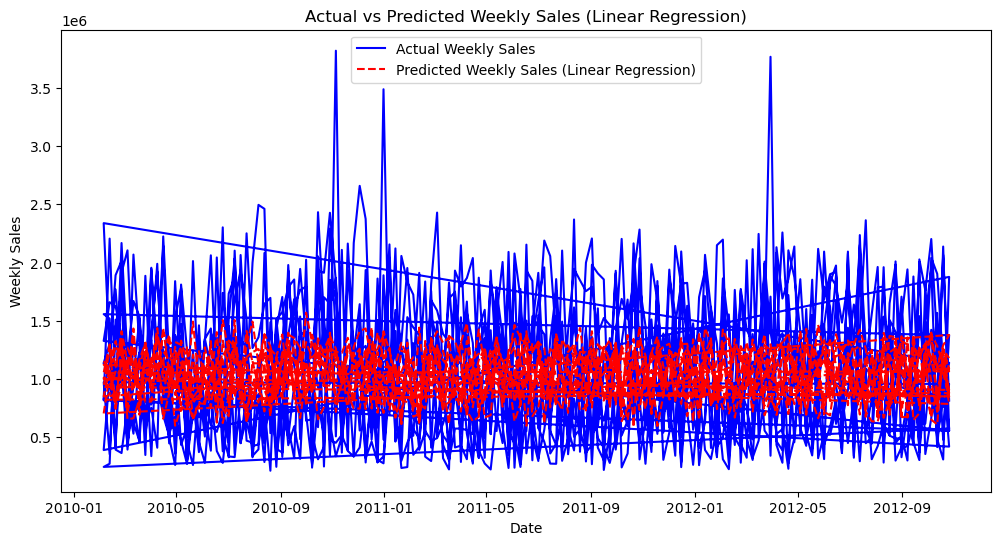

In [56]:
# Plot actual vs predicted sales for Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'][len(dataset)-len(y_test):], y_test, label='Actual Weekly Sales', color='blue')
plt.plot(dataset['Date'][len(dataset)-len(y_test):], y_pred_linear, label='Predicted Weekly Sales (Linear Regression)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales (Linear Regression)')
plt.legend()
plt.show()

# Random Forest Regression

In [57]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [58]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [59]:
# Predict sales on the test set
y_pred_rf = rf_model.predict(X_test)

In [60]:
# Calculate evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest Mean Absolute Error (MAE): {mae_rf}')
print(f'Random Forest R-squared (R2): {r2_rf}')

Random Forest Mean Squared Error (MSE): 18565147603.976215
Random Forest Mean Absolute Error (MAE): 70494.92054607614
Random Forest R-squared (R2): 0.9423719244050338


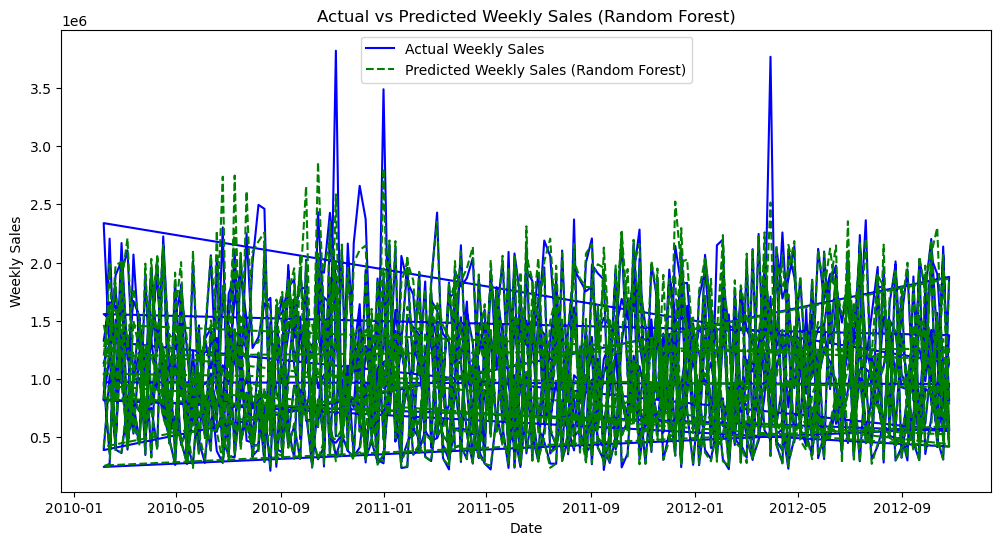

In [61]:
# Plot actual vs predicted sales for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'][len(dataset)-len(y_test):], y_test, label='Actual Weekly Sales', color='blue')
plt.plot(dataset['Date'][len(dataset)-len(y_test):], y_pred_rf, label='Predicted Weekly Sales (Random Forest)', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales (Random Forest)')
plt.legend()
plt.show()

In [63]:
#Get feature importances for Random Forest
rf_feature_importance = rf_model.feature_importances_

# Pair feature names with their importance scores
feature_names = X.columns
rf_feature_importance_dict = dict(zip(feature_names, rf_feature_importance))

# Sort features by importance in descending order
rf_sorted_feature_importance = sorted(rf_feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print('Random Forest Feature Importance:')
for feature, importance in rf_sorted_feature_importance:
    print(f'{feature}: {importance}')

Random Forest Feature Importance:
Store: 0.764231221832417
CPI: 0.18648012826680344
Month: 0.037763010795528025
Holiday_Flag: 0.006533810476728712
Year: 0.004991828628522889
DayOfWeek: 0.0


# Comparing the Models

In [64]:
# Compare model accuracies
print(f'Linear Regression Mean Squared Error (MSE): {mse_linear}')
print(f'Random Forest Mean Squared Error (MSE): {mse_rf}')

Linear Regression Mean Squared Error (MSE): 274358062063.70114
Random Forest Mean Squared Error (MSE): 18565147603.976215
